# Libs

In [129]:
import os

import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.losses import categorical_crossentropy

# Dataset Generation

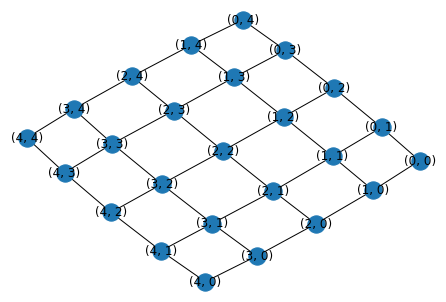

In [52]:
G = nx.grid_2d_graph(5,5)
nx.draw(G,with_labels=True,layout=nx.kamada_kawai_layout)

In [53]:
node_list = list(G.nodes)
edge_list = list(G.edges)

for r,s in edge_list:
    G.add_edge(r,s,weight=500 + 500 * np.random.rand())

node_to_idx = {node:idx for idx,node in enumerate(node_list)}
node_idx_list = [node_to_idx[node] for node in node_list]

In [63]:
Dataset = []
for r in node_list:
    for s in node_list:
        if r == s:
            continue
        for idx, path in enumerate(nx.shortest_simple_paths(G,source=r,target=s)):
            if idx >= 20:
                break
            Dataset.append(path)

In [65]:
max_len = 0
for path in Dataset:
    if len(path) > max_len:
        max_len = len(path)

In [80]:
Dataset_el = []
valid_len = []
for path in Dataset:
    update_path = [node_to_idx[node] for node in path]
    update_path_len = len(update_path)
    valid_len.append(update_path_len)
    if update_path_len < max_len:
        update_path += (-np.ones((1,max_len - update_path_len),dtype = int)).flatten().tolist()
    Dataset_el.append(update_path)

In [99]:
prob = np.zeros((len(node_list),len(node_list)))
for path in Dataset_el:
    for idx, center in enumerate(path):
        if center == -1:
            break
        for i in range(idx - 2,idx + 2):
            if i < 0 or i >= 10:
                continue
            prob[center,path[i]] += 1

In [112]:
for i in range(len(node_list)):
    prob[i] /= prob[i,i]
    prob[i,i] = 0

In [147]:
x_in = Input(shape=(1,))
h = Embedding(len(node_list),10,input_length=1)(x_in)
h = Flatten()(h)
o = Dense(len(node_list),
          kernel_initializer=he_normal(),
          use_bias=False,
          activation='softmax')(h)
model = Model(inputs=x_in,outputs=o)
model.compile(optimizer=Adam(1e-3),loss=categorical_crossentropy)

hist = model.fit(np.arange(len(node_list)),prob,batch_size=len(prob),epochs=20000)

Epoch 1/20000
25/25 [==============================] - 0s 11ms/sample - loss: 7.9611
Epoch 2/20000
25/25 [==============================] - 0s 78us/sample - loss: 7.9576
Epoch 3/20000
25/25 [==============================] - 0s 38us/sample - loss: 7.9542
Epoch 4/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.9508
Epoch 5/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.9473
Epoch 6/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.9439
Epoch 7/20000
25/25 [==============================] - 0s 120us/sample - loss: 7.9405
Epoch 8/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.9370
Epoch 9/20000
25/25 [==============================] - 0s 78us/sample - loss: 7.9336
Epoch 10/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.9302
Epoch 11/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.9267
Epoch 12/20000
25/25 [==============================] - 0s 41u

Epoch 97/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.5573
Epoch 98/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5519
Epoch 99/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5464
Epoch 100/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5410
Epoch 101/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5355
Epoch 102/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.5300
Epoch 103/20000
25/25 [==============================] - 0s 78us/sample - loss: 7.5245
Epoch 104/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.5190
Epoch 105/20000
25/25 [==============================] - 0s 40us/sample - loss: 7.5134
Epoch 106/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5078
Epoch 107/20000
25/25 [==============================] - 0s 80us/sample - loss: 7.5022
Epoch 108/20000
25/25 [=======================

Epoch 192/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9774
Epoch 193/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9711
Epoch 194/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9648
Epoch 195/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9584
Epoch 196/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.9521
Epoch 197/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9458
Epoch 198/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9395
Epoch 199/20000
25/25 [==============================] - 0s 160us/sample - loss: 6.9332
Epoch 200/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9269
Epoch 201/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.9206
Epoch 202/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.9143
Epoch 203/20000
25/25 [===================

Epoch 287/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.4211
Epoch 288/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.4159
Epoch 289/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.4108
Epoch 290/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.4056
Epoch 291/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.4005
Epoch 292/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.3953
Epoch 293/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.3902
Epoch 294/20000
25/25 [==============================] - 0s 160us/sample - loss: 6.3851
Epoch 295/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.3801
Epoch 296/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.3750
Epoch 297/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.3700
Epoch 298/20000
25/25 [===================

Epoch 382/20000
25/25 [==============================] - 0s 80us/sample - loss: 6.0042
Epoch 383/20000
25/25 [==============================] - 0s 40us/sample - loss: 6.0006
Epoch 384/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.9971
Epoch 385/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9935
Epoch 386/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9900
Epoch 387/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.9865
Epoch 388/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9830
Epoch 389/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9795
Epoch 390/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.9760
Epoch 391/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9726
Epoch 392/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.9692
Epoch 393/20000
25/25 [====================

Epoch 477/20000
25/25 [==============================] - 0s 160us/sample - loss: 5.7289
Epoch 478/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.7266
Epoch 479/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.7244
Epoch 480/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.7221
Epoch 481/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.7198
Epoch 482/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.7175
Epoch 483/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.7153
Epoch 484/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.7131
Epoch 485/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.7108
Epoch 486/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.7086
Epoch 487/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.7064
Epoch 488/20000
25/25 [==================

Epoch 572/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.5491
Epoch 573/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.5475
Epoch 574/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.5460
Epoch 575/20000
25/25 [==============================] - 0s 81us/sample - loss: 5.5444
Epoch 576/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.5429
Epoch 577/20000
25/25 [==============================] - 0s 81us/sample - loss: 5.5414
Epoch 578/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.5399
Epoch 579/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.5383
Epoch 580/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.5368
Epoch 581/20000
25/25 [==============================] - 0s 81us/sample - loss: 5.5353
Epoch 582/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.5338
Epoch 583/20000
25/25 [====================

25/25 [==============================] - 0s 40us/sample - loss: 5.4244
Epoch 667/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.4232
Epoch 668/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.4221
Epoch 669/20000
25/25 [==============================] - 0s 160us/sample - loss: 5.4210
Epoch 670/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.4198
Epoch 671/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.4187
Epoch 672/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.4176
Epoch 673/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.4165
Epoch 674/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.4153
Epoch 675/20000
25/25 [==============================] - 0s 159us/sample - loss: 5.4142
Epoch 676/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.4131
Epoch 677/20000
25/25 [==============================] -

Epoch 761/20000
25/25 [==============================] - 0s 160us/sample - loss: 5.3290
Epoch 762/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.3281
Epoch 763/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.3272
Epoch 764/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.3263
Epoch 765/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.3255
Epoch 766/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.3246
Epoch 767/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.3237
Epoch 768/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.3228
Epoch 769/20000
25/25 [==============================] - 0s 160us/sample - loss: 5.3220
Epoch 770/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.3211
Epoch 771/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.3202
Epoch 772/20000
25/25 [==================

Epoch 856/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.2537
Epoch 857/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.2530
Epoch 858/20000
25/25 [==============================] - 0s 79us/sample - loss: 5.2523
Epoch 859/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.2516
Epoch 860/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.2509
Epoch 861/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.2502
Epoch 862/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.2495
Epoch 863/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.2488
Epoch 864/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.2481
Epoch 865/20000
25/25 [==============================] - 0s 39us/sample - loss: 5.2474
Epoch 866/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.2467
Epoch 867/20000
25/25 [=================

Epoch 950/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1940
Epoch 951/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1934
Epoch 952/20000
25/25 [==============================] - 0s 108us/sample - loss: 5.1929
Epoch 953/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.1923
Epoch 954/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1917
Epoch 955/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1912
Epoch 956/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.1906
Epoch 957/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1900
Epoch 958/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1895
Epoch 959/20000
25/25 [==============================] - 0s 70us/sample - loss: 5.1889
Epoch 960/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1884
Epoch 961/20000
25/25 [=================

Epoch 1044/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1459
Epoch 1045/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1454
Epoch 1046/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1450
Epoch 1047/20000
25/25 [==============================] - 0s 79us/sample - loss: 5.1445
Epoch 1048/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1441
Epoch 1049/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1436
Epoch 1050/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1432
Epoch 1051/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1427
Epoch 1052/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1423
Epoch 1053/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1418
Epoch 1054/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1414
Epoch 1055/20000
25/25 [========

Epoch 1138/20000
25/25 [==============================] - 0s 79us/sample - loss: 5.1071
Epoch 1139/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1067
Epoch 1140/20000
25/25 [==============================] - 0s 160us/sample - loss: 5.1064
Epoch 1141/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1060
Epoch 1142/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1056
Epoch 1143/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1053
Epoch 1144/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1049
Epoch 1145/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1045
Epoch 1146/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1042
Epoch 1147/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.1038
Epoch 1148/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.1034
Epoch 1149/20000
25/25 [=======

Epoch 1231/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.0758
Epoch 1232/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0755
Epoch 1233/20000
25/25 [==============================] - 0s 79us/sample - loss: 5.0752
Epoch 1234/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0749
Epoch 1235/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0746
Epoch 1236/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0743
Epoch 1237/20000
25/25 [==============================] - 0s 79us/sample - loss: 5.0740
Epoch 1238/20000
25/25 [==============================] - 0s 39us/sample - loss: 5.0737
Epoch 1239/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0733
Epoch 1240/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0730
Epoch 1241/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0727
Epoch 1242/20000
25/25 [=======

Epoch 1324/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0497
Epoch 1325/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0495
Epoch 1326/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.0492
Epoch 1327/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0490
Epoch 1328/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0487
Epoch 1329/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0484
Epoch 1330/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0482
Epoch 1331/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0479
Epoch 1332/20000
25/25 [==============================] - 0s 120us/sample - loss: 5.0477
Epoch 1333/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0474
Epoch 1334/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0472
Epoch 1335/20000
25/25 [======

Epoch 1417/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0277
Epoch 1418/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0275
Epoch 1419/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0273
Epoch 1420/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0271
Epoch 1421/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0268
Epoch 1422/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0266
Epoch 1423/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0264
Epoch 1424/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0262
Epoch 1425/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0260
Epoch 1426/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0258
Epoch 1427/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0255
Epoch 1428/20000
25/25 [========

Epoch 1510/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0088
Epoch 1511/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0086
Epoch 1512/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0084
Epoch 1513/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0083
Epoch 1514/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0081
Epoch 1515/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0079
Epoch 1516/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0077
Epoch 1517/20000
25/25 [==============================] - 0s 80us/sample - loss: 5.0075
Epoch 1518/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0073
Epoch 1519/20000
25/25 [==============================] - 0s 40us/sample - loss: 5.0071
Epoch 1520/20000
25/25 [==============================] - 0s 39us/sample - loss: 5.0069
Epoch 1521/20000
25/25 [========

Epoch 1604/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.9922
Epoch 1605/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.9920
Epoch 1606/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9919
Epoch 1607/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9917
Epoch 1608/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9915
Epoch 1609/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9914
Epoch 1610/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.9912
Epoch 1611/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9911
Epoch 1612/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.9909
Epoch 1613/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9907
Epoch 1614/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.9906
Epoch 1615/20000
25/25 [========

Epoch 1697/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9778
Epoch 1698/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9776
Epoch 1699/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9775
Epoch 1700/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9773
Epoch 1701/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9772
Epoch 1702/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9770
Epoch 1703/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9769
Epoch 1704/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9768
Epoch 1705/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9766
Epoch 1706/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9765
Epoch 1707/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.9763
Epoch 1708/20000
25/25 [=======

Epoch 1791/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9649
Epoch 1792/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.9648
Epoch 1793/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9646
Epoch 1794/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9645
Epoch 1795/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9644
Epoch 1796/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9643
Epoch 1797/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9641
Epoch 1798/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9640
Epoch 1799/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9639
Epoch 1800/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9637
Epoch 1801/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9636
Epoch 1802/20000
25/25 [========

Epoch 1884/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9537
Epoch 1885/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9535
Epoch 1886/20000
25/25 [==============================] - 0s 38us/sample - loss: 4.9534
Epoch 1887/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9533
Epoch 1888/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9532
Epoch 1889/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9531
Epoch 1890/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9530
Epoch 1891/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9529
Epoch 1892/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9527
Epoch 1893/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9526
Epoch 1894/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9525
Epoch 1895/20000
25/25 [=======

Epoch 1978/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9436
Epoch 1979/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9435
Epoch 1980/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9434
Epoch 1981/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9433
Epoch 1982/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.9432
Epoch 1983/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9431
Epoch 1984/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9430
Epoch 1985/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9429
Epoch 1986/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9428
Epoch 1987/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9427
Epoch 1988/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9426
Epoch 1989/20000
25/25 [=======

Epoch 2071/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9349
Epoch 2072/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9348
Epoch 2073/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9347
Epoch 2074/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9347
Epoch 2075/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9346
Epoch 2076/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9345
Epoch 2077/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9344
Epoch 2078/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9343
Epoch 2079/20000
25/25 [==============================] - 0s 42us/sample - loss: 4.9342
Epoch 2080/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9341
Epoch 2081/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9340
Epoch 2082/20000
25/25 [======

Epoch 2165/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9271
Epoch 2166/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9271
Epoch 2167/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9270
Epoch 2168/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9269
Epoch 2169/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9268
Epoch 2170/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9267
Epoch 2171/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9267
Epoch 2172/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9266
Epoch 2173/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9265
Epoch 2174/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9264
Epoch 2175/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9264
Epoch 2176/20000
25/25 [=======

Epoch 2258/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.9203
Epoch 2259/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9202
Epoch 2260/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9202
Epoch 2261/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9201
Epoch 2262/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9200
Epoch 2263/20000
25/25 [==============================] - 0s 82us/sample - loss: 4.9199
Epoch 2264/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9199
Epoch 2265/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.9198
Epoch 2266/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9197
Epoch 2267/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9197
Epoch 2268/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.9196
Epoch 2269/20000
25/25 [========

Epoch 2352/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9141
Epoch 2353/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9140
Epoch 2354/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.9139
Epoch 2355/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9139
Epoch 2356/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9138
Epoch 2357/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9138
Epoch 2358/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9137
Epoch 2359/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9136
Epoch 2360/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9136
Epoch 2361/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9135
Epoch 2362/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9134
Epoch 2363/20000
25/25 [======

Epoch 2445/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9084
Epoch 2446/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9084
Epoch 2447/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9083
Epoch 2448/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9083
Epoch 2449/20000
25/25 [==============================] - 0s 159us/sample - loss: 4.9082
Epoch 2450/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9082
Epoch 2451/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9081
Epoch 2452/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9080
Epoch 2453/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.9080
Epoch 2454/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9079
Epoch 2455/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9079
Epoch 2456/20000
25/25 [=======

Epoch 2538/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9032
Epoch 2539/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.9032
Epoch 2540/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.9031
Epoch 2541/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.9031
Epoch 2542/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.9030
Epoch 2543/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9029
Epoch 2544/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9029
Epoch 2545/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.9028
Epoch 2546/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.9028
Epoch 2547/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.9027
Epoch 2548/20000
25/25 [==============================] - 0s 117us/sample - loss: 4.9027
Epoch 2549/20000
25/25 [=====

Epoch 2631/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8983
Epoch 2632/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8982
Epoch 2633/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8982
Epoch 2634/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8981
Epoch 2635/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8981
Epoch 2636/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8980
Epoch 2637/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8980
Epoch 2638/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8979
Epoch 2639/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8979
Epoch 2640/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8978
Epoch 2641/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8978
Epoch 2642/20000
25/25 [========

Epoch 2724/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8936
Epoch 2725/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8936
Epoch 2726/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8935
Epoch 2727/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8935
Epoch 2728/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8934
Epoch 2729/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8934
Epoch 2730/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8933
Epoch 2731/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8933
Epoch 2732/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8933
Epoch 2733/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8932
Epoch 2734/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8932
Epoch 2735/20000
25/25 [======

Epoch 2818/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8892
Epoch 2819/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8891
Epoch 2820/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8891
Epoch 2821/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8890
Epoch 2822/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8890
Epoch 2823/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8890
Epoch 2824/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8889
Epoch 2825/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8889
Epoch 2826/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8888
Epoch 2827/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8888
Epoch 2828/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8887
Epoch 2829/20000
25/25 [======

Epoch 2911/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8850
Epoch 2912/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8850
Epoch 2913/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8850
Epoch 2914/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8849
Epoch 2915/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8849
Epoch 2916/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8848
Epoch 2917/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8848
Epoch 2918/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8847
Epoch 2919/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8847
Epoch 2920/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8847
Epoch 2921/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8846
Epoch 2922/20000
25/25 [========

Epoch 3005/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8812
Epoch 3006/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8811
Epoch 3007/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8811
Epoch 3008/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8811
Epoch 3009/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8810
Epoch 3010/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8810
Epoch 3011/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8809
Epoch 3012/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8809
Epoch 3013/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8809
Epoch 3014/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8808
Epoch 3015/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8808
Epoch 3016/20000
25/25 [=======

Epoch 3098/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8777
Epoch 3099/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8777
Epoch 3100/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8776
Epoch 3101/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8776
Epoch 3102/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8775
Epoch 3103/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8775
Epoch 3104/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8775
Epoch 3105/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8774
Epoch 3106/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8774
Epoch 3107/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8774
Epoch 3108/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8773
Epoch 3109/20000
25/25 [========

Epoch 3192/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8745
Epoch 3193/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8745
Epoch 3194/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8745
Epoch 3195/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8744
Epoch 3196/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8744
Epoch 3197/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8744
Epoch 3198/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8743
Epoch 3199/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8743
Epoch 3200/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8743
Epoch 3201/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8742
Epoch 3202/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8742
Epoch 3203/20000
25/25 [=======

Epoch 3286/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8717
Epoch 3287/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8717
Epoch 3288/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8716
Epoch 3289/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8716
Epoch 3290/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8716
Epoch 3291/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8716
Epoch 3292/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8715
Epoch 3293/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8715
Epoch 3294/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8715
Epoch 3295/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8714
Epoch 3296/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8714
Epoch 3297/20000
25/25 [========

Epoch 3380/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8692
Epoch 3381/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8692
Epoch 3382/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8691
Epoch 3383/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8691
Epoch 3384/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8691
Epoch 3385/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8691
Epoch 3386/20000
25/25 [==============================] - 0s 82us/sample - loss: 4.8690
Epoch 3387/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8690
Epoch 3388/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8690
Epoch 3389/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8690
Epoch 3390/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8690
Epoch 3391/20000
25/25 [========

Epoch 3473/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8670
Epoch 3474/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8670
Epoch 3475/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8670
Epoch 3476/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8669
Epoch 3477/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8669
Epoch 3478/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8669
Epoch 3479/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8669
Epoch 3480/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8669
Epoch 3481/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8668
Epoch 3482/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8668
Epoch 3483/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8668
Epoch 3484/20000
25/25 [=======

Epoch 3567/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8651
Epoch 3568/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8650
Epoch 3569/20000
25/25 [==============================] - 0s 38us/sample - loss: 4.8650
Epoch 3570/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8650
Epoch 3571/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8650
Epoch 3572/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8650
Epoch 3573/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8649
Epoch 3574/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8649
Epoch 3575/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8649
Epoch 3576/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8649
Epoch 3577/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8649
Epoch 3578/20000
25/25 [=======

Epoch 3660/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8633
Epoch 3661/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8633
Epoch 3662/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8633
Epoch 3663/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8633
Epoch 3664/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8633
Epoch 3665/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8633
Epoch 3666/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8632
Epoch 3667/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8632
Epoch 3668/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8632
Epoch 3669/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8632
Epoch 3670/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8632
Epoch 3671/20000
25/25 [========

Epoch 3753/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8618
Epoch 3754/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8618
Epoch 3755/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8618
Epoch 3756/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8618
Epoch 3757/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8618
Epoch 3758/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8617
Epoch 3759/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8617
Epoch 3760/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8617
Epoch 3761/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8617
Epoch 3762/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8617
Epoch 3763/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8617
Epoch 3764/20000
25/25 [=======

Epoch 3847/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8605
Epoch 3848/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8604
Epoch 3849/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8604
Epoch 3850/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8604
Epoch 3851/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8604
Epoch 3852/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8604
Epoch 3853/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8604
Epoch 3854/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8604
Epoch 3855/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8603
Epoch 3856/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8603
Epoch 3857/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8603
Epoch 3858/20000
25/25 [======

Epoch 3941/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8592
Epoch 3942/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8592
Epoch 3943/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8592
Epoch 3944/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8592
Epoch 3945/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8592
Epoch 3946/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8592
Epoch 3947/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8592
Epoch 3948/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8591
Epoch 3949/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8591
Epoch 3950/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8591
Epoch 3951/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8591
Epoch 3952/20000
25/25 [=======

Epoch 4035/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8581
Epoch 4036/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8581
Epoch 4037/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8581
Epoch 4038/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8581
Epoch 4039/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8581
Epoch 4040/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8581
Epoch 4041/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8581
Epoch 4042/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8581
Epoch 4043/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8580
Epoch 4044/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8580
Epoch 4045/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8580
Epoch 4046/20000
25/25 [======

Epoch 4129/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8571
Epoch 4130/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8571
Epoch 4131/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8571
Epoch 4132/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8571
Epoch 4133/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8571
Epoch 4134/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8571
Epoch 4135/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8571
Epoch 4136/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8571
Epoch 4137/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8571
Epoch 4138/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8571
Epoch 4139/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8570
Epoch 4140/20000
25/25 [=======

Epoch 4223/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8563
Epoch 4224/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8563
Epoch 4225/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8562
Epoch 4226/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8562
Epoch 4227/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8562
Epoch 4228/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8562
Epoch 4229/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8562
Epoch 4230/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8562
Epoch 4231/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8562
Epoch 4232/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8562
Epoch 4233/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8562
Epoch 4234/20000
25/25 [======

Epoch 4317/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8555
Epoch 4318/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8555
Epoch 4319/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8555
Epoch 4320/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8554
Epoch 4321/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8554
Epoch 4322/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8554
Epoch 4323/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8554
Epoch 4324/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8554
Epoch 4325/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8554
Epoch 4326/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8554
Epoch 4327/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8554
Epoch 4328/20000
25/25 [======

Epoch 4410/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8548
Epoch 4411/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8548
Epoch 4412/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8548
Epoch 4413/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8547
Epoch 4414/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8547
Epoch 4415/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8547
Epoch 4416/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8547
Epoch 4417/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8547
Epoch 4418/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8547
Epoch 4419/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8547
Epoch 4420/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8547
Epoch 4421/20000
25/25 [=======

Epoch 4503/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8541
Epoch 4504/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4505/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4506/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8541
Epoch 4507/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4508/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4509/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4510/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8541
Epoch 4511/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8541
Epoch 4512/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8541
Epoch 4513/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8541
Epoch 4514/20000
25/25 [=======

Epoch 4597/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8535
Epoch 4598/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8535
Epoch 4599/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8535
Epoch 4600/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8535
Epoch 4601/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8535
Epoch 4602/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8535
Epoch 4603/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8535
Epoch 4604/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8535
Epoch 4605/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8535
Epoch 4606/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8535
Epoch 4607/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8535
Epoch 4608/20000
25/25 [=======

Epoch 4691/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8530
Epoch 4692/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8530
Epoch 4693/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8530
Epoch 4694/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8530
Epoch 4695/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8530
Epoch 4696/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8530
Epoch 4697/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8530
Epoch 4698/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8530
Epoch 4699/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8530
Epoch 4700/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8530
Epoch 4701/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8530
Epoch 4702/20000
25/25 [======

Epoch 4784/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4785/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4786/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8525
Epoch 4787/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4788/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4789/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8525
Epoch 4790/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4791/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8525
Epoch 4792/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8525
Epoch 4793/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8525
Epoch 4794/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8525
Epoch 4795/20000
25/25 [=====

Epoch 4877/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8521
Epoch 4878/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8521
Epoch 4879/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4880/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4881/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4882/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4883/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8521
Epoch 4884/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4885/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8521
Epoch 4886/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8521
Epoch 4887/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8521
Epoch 4888/20000
25/25 [=======

Epoch 4970/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8517
Epoch 4971/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8517
Epoch 4972/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8517
Epoch 4973/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8517
Epoch 4974/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8517
Epoch 4975/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8517
Epoch 4976/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8517
Epoch 4977/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8517
Epoch 4978/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8517
Epoch 4979/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8517
Epoch 4980/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8517
Epoch 4981/20000
25/25 [======

Epoch 5063/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8514
Epoch 5064/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8514
Epoch 5065/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8514
Epoch 5066/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8514
Epoch 5067/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8513
Epoch 5068/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8513
Epoch 5069/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8513
Epoch 5070/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8513
Epoch 5071/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8513
Epoch 5072/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8513
Epoch 5073/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8513
Epoch 5074/20000
25/25 [========

Epoch 5157/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5158/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5159/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5160/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5161/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5162/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8510
Epoch 5163/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5164/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8510
Epoch 5165/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8510
Epoch 5166/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8510
Epoch 5167/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8510
Epoch 5168/20000
25/25 [=======

Epoch 5251/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5252/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5253/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5254/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5255/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5256/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5257/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5258/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8507
Epoch 5259/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8507
Epoch 5260/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5261/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8507
Epoch 5262/20000
25/25 [========

Epoch 5345/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8505
Epoch 5346/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8505
Epoch 5347/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8504
Epoch 5348/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8504
Epoch 5349/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8504
Epoch 5350/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8504
Epoch 5351/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8504
Epoch 5352/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8504
Epoch 5353/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8504
Epoch 5354/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8504
Epoch 5355/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8504
Epoch 5356/20000
25/25 [========

Epoch 5438/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8502
Epoch 5439/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8502
Epoch 5440/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8502
Epoch 5441/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8502
Epoch 5442/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8502
Epoch 5443/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8502
Epoch 5444/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8502
Epoch 5445/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8502
Epoch 5446/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8502
Epoch 5447/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8502
Epoch 5448/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8502
Epoch 5449/20000
25/25 [======

Epoch 5531/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8500
Epoch 5532/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8500
Epoch 5533/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8500
Epoch 5534/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8500
Epoch 5535/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8500
Epoch 5536/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8500
Epoch 5537/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8500
Epoch 5538/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8500
Epoch 5539/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8500
Epoch 5540/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8500
Epoch 5541/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8499
Epoch 5542/20000
25/25 [=======

Epoch 5624/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8498
Epoch 5625/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8498
Epoch 5626/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8498
Epoch 5627/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8498
Epoch 5628/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8498
Epoch 5629/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8497
Epoch 5630/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8497
Epoch 5631/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8497
Epoch 5632/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8497
Epoch 5633/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8497
Epoch 5634/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8497
Epoch 5635/20000
25/25 [======

Epoch 5717/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8496
Epoch 5718/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8496
Epoch 5719/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8496
Epoch 5720/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8496
Epoch 5721/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8496
Epoch 5722/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8496
Epoch 5723/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8496
Epoch 5724/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8496
Epoch 5725/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8495
Epoch 5726/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8495
Epoch 5727/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8495
Epoch 5728/20000
25/25 [======

Epoch 5810/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5811/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5812/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8494
Epoch 5813/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5814/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8494
Epoch 5815/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8494
Epoch 5816/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5817/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8494
Epoch 5818/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5819/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8494
Epoch 5820/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8494
Epoch 5821/20000
25/25 [=======

Epoch 5904/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8492
Epoch 5905/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8492
Epoch 5906/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8492
Epoch 5907/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8492
Epoch 5908/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8492
Epoch 5909/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8492
Epoch 5910/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8492
Epoch 5911/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8492
Epoch 5912/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8492
Epoch 5913/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8492
Epoch 5914/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8492
Epoch 5915/20000
25/25 [=======

Epoch 5998/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8491
Epoch 5999/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8491
Epoch 6000/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8491
Epoch 6001/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8491
Epoch 6002/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8491
Epoch 6003/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8491
Epoch 6004/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8491
Epoch 6005/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8490
Epoch 6006/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8490
Epoch 6007/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8490
Epoch 6008/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8490
Epoch 6009/20000
25/25 [=======

Epoch 6091/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8489
Epoch 6092/20000
25/25 [==============================] - 0s 82us/sample - loss: 4.8489
Epoch 6093/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8489
Epoch 6094/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8489
Epoch 6095/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8489
Epoch 6096/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8489
Epoch 6097/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8489
Epoch 6098/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8489
Epoch 6099/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8489
Epoch 6100/20000
25/25 [==============================] - 0s 118us/sample - loss: 4.8489
Epoch 6101/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8489
Epoch 6102/20000
25/25 [======

Epoch 6184/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6185/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6186/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6187/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8488
Epoch 6188/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6189/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8488
Epoch 6190/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6191/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8488
Epoch 6192/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8488
Epoch 6193/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8488
Epoch 6194/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8488
Epoch 6195/20000
25/25 [========

Epoch 6277/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8487
Epoch 6278/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8487
Epoch 6279/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8487
Epoch 6280/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8487
Epoch 6281/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8487
Epoch 6282/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8487
Epoch 6283/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8487
Epoch 6284/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8487
Epoch 6285/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8487
Epoch 6286/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8487
Epoch 6287/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8486
Epoch 6288/20000
25/25 [=======

Epoch 6370/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6371/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8485
Epoch 6372/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6373/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8485
Epoch 6374/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6375/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6376/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6377/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6378/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6379/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6380/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8485
Epoch 6381/20000
25/25 [========

Epoch 6463/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6464/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6465/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8484
Epoch 6466/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6467/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8484
Epoch 6468/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8484
Epoch 6469/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6470/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8484
Epoch 6471/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8484
Epoch 6472/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6473/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8484
Epoch 6474/20000
25/25 [=====

Epoch 6556/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6557/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8483
Epoch 6558/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8483
Epoch 6559/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8483
Epoch 6560/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6561/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6562/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8483
Epoch 6563/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8483
Epoch 6564/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8483
Epoch 6565/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8483
Epoch 6566/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8483
Epoch 6567/20000
25/25 [=====

Epoch 6649/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6650/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6651/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8483
Epoch 6652/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8482
Epoch 6653/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6654/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6655/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6656/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8482
Epoch 6657/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8482
Epoch 6658/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8482
Epoch 6659/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8482
Epoch 6660/20000
25/25 [======

Epoch 6742/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6743/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6744/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8482
Epoch 6745/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6746/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6747/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6748/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6749/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8482
Epoch 6750/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6751/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8482
Epoch 6752/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8482
Epoch 6753/20000
25/25 [========

Epoch 6836/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6837/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6838/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8481
Epoch 6839/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8481
Epoch 6840/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8481
Epoch 6841/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6842/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6843/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6844/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6845/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8481
Epoch 6846/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8481
Epoch 6847/20000
25/25 [======

Epoch 6929/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8480
Epoch 6930/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8480
Epoch 6931/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8480
Epoch 6932/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8480
Epoch 6933/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8480
Epoch 6934/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8480
Epoch 6935/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8480
Epoch 6936/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8480
Epoch 6937/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8480
Epoch 6938/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8480
Epoch 6939/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8480
Epoch 6940/20000
25/25 [=======

Epoch 7023/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7024/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7025/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8479
Epoch 7026/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7027/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7028/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7029/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7030/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7031/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8479
Epoch 7032/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8479
Epoch 7033/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7034/20000
25/25 [=====

Epoch 7116/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7117/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7118/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7119/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8479
Epoch 7120/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7121/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8479
Epoch 7122/20000
25/25 [==============================] - 0s 159us/sample - loss: 4.8479
Epoch 7123/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8479
Epoch 7124/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8479
Epoch 7125/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7126/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8479
Epoch 7127/20000
25/25 [====

Epoch 7209/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7210/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7211/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8478
Epoch 7212/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8478
Epoch 7213/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8478
Epoch 7214/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7215/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8478
Epoch 7216/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7217/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8478
Epoch 7218/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8478
Epoch 7219/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7220/20000
25/25 [========

Epoch 7303/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7304/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8478
Epoch 7305/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7306/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8478
Epoch 7307/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8478
Epoch 7308/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8478
Epoch 7309/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8478
Epoch 7310/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8478
Epoch 7311/20000
25/25 [==============================] - 0s 38us/sample - loss: 4.8478
Epoch 7312/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8478
Epoch 7313/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8478
Epoch 7314/20000
25/25 [========

Epoch 7397/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7398/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7399/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8477
Epoch 7400/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8477
Epoch 7401/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7402/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7403/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7404/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7405/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7406/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8477
Epoch 7407/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7408/20000
25/25 [=======

Epoch 7491/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8477
Epoch 7492/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7493/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7494/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7495/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7496/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7497/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7498/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8477
Epoch 7499/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7500/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8477
Epoch 7501/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8477
Epoch 7502/20000
25/25 [======

Epoch 7584/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7585/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7586/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7587/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7588/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8476
Epoch 7589/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8476
Epoch 7590/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7591/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7592/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7593/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8476
Epoch 7594/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8476
Epoch 7595/20000
25/25 [======

Epoch 7677/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8476
Epoch 7678/20000
25/25 [==============================] - 0s 279us/sample - loss: 4.8476
Epoch 7679/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8476
Epoch 7680/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8476
Epoch 7681/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8476
Epoch 7682/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8476
Epoch 7683/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8476
Epoch 7684/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8476
Epoch 7685/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8476
Epoch 7686/20000
25/25 [==============================] - 0s 240us/sample - loss: 4.8476
Epoch 7687/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8476
Epoch 7688/20000
25/25 [=

Epoch 7770/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7771/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8475
Epoch 7772/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8475
Epoch 7773/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8475
Epoch 7774/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8475
Epoch 7775/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8475
Epoch 7776/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7777/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7778/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7779/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7780/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7781/20000
25/25 [======

Epoch 7863/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8475
Epoch 7864/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8475
Epoch 7865/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7866/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8475
Epoch 7867/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8475
Epoch 7868/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7869/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8475
Epoch 7870/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7871/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7872/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8475
Epoch 7873/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7874/20000
25/25 [=======

Epoch 7956/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8475
Epoch 7957/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8475
Epoch 7958/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 7959/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 7960/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 7961/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 7962/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 7963/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 7964/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 7965/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 7966/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 7967/20000
25/25 [========

Epoch 8050/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8051/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8052/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8053/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8054/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8055/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8056/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8057/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8474
Epoch 8058/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8059/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8060/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8061/20000
25/25 [========

Epoch 8144/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8145/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8146/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8147/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8148/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8474
Epoch 8149/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8150/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8151/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8152/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8153/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8474
Epoch 8154/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8155/20000
25/25 [========

Epoch 8237/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8238/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8239/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8474
Epoch 8240/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8241/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8474
Epoch 8242/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8243/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8474
Epoch 8244/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8474
Epoch 8245/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8246/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8474
Epoch 8247/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8474
Epoch 8248/20000
25/25 [====

Epoch 8330/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8331/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8332/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8333/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8334/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8335/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8336/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8337/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8338/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8339/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8340/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8341/20000
25/25 [======

Epoch 8423/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8424/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8425/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8426/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8427/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8428/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8429/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8473
Epoch 8430/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8431/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8432/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8473
Epoch 8433/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8434/20000
25/25 [======

Epoch 8516/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8517/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8518/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8519/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8520/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8521/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8522/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8523/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8524/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8525/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8526/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8527/20000
25/25 [======

Epoch 8609/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8473
Epoch 8610/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8473
Epoch 8611/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8612/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8613/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8473
Epoch 8614/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8615/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8616/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8617/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8618/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8473
Epoch 8619/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8473
Epoch 8620/20000
25/25 [=======

Epoch 8702/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8703/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8704/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8705/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8706/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8707/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8472
Epoch 8708/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8709/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8710/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8711/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8712/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8713/20000
25/25 [=======

Epoch 8795/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8796/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8797/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8798/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8472
Epoch 8799/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8800/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8801/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8802/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8803/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8804/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8805/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8806/20000
25/25 [=====

Epoch 8888/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8889/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8890/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8891/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8892/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8893/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8894/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8472
Epoch 8895/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8896/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8897/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8898/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8899/20000
25/25 [=======

Epoch 8981/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8982/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8983/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8984/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8985/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 8986/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8987/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8988/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8989/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8990/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 8991/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 8992/20000
25/25 [======

Epoch 9075/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 9076/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9077/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 9078/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8472
Epoch 9079/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9080/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8472
Epoch 9081/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9082/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9083/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9084/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9085/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8472
Epoch 9086/20000
25/25 [=======

Epoch 9168/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8471
Epoch 9169/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9170/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9171/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9172/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9173/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9174/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9175/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9176/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9177/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9178/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9179/20000
25/25 [=====

Epoch 9262/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9263/20000
25/25 [==============================] - 0s 38us/sample - loss: 4.8471
Epoch 9264/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9265/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9266/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9267/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8471
Epoch 9268/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8471
Epoch 9269/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9270/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9271/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9272/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8471
Epoch 9273/20000
25/25 [======

Epoch 9355/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9356/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9357/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8471
Epoch 9358/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9359/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9360/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9361/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9362/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8471
Epoch 9363/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9364/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9365/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8471
Epoch 9366/20000
25/25 [=======

Epoch 9448/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9449/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9450/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9451/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9452/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9453/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9454/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9455/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9456/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9457/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9458/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9459/20000
25/25 [=======

Epoch 9541/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9542/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9543/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9544/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9545/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9546/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9547/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9548/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9549/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9550/20000
25/25 [==============================] - 0s 439us/sample - loss: 4.8471
Epoch 9551/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9552/20000
25/25 [=====

Epoch 9634/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8471
Epoch 9635/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9636/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9637/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9638/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9639/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9640/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9641/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9642/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9643/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9644/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9645/20000
25/25 [=======

Epoch 9727/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8471
Epoch 9728/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9729/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9730/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9731/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8471
Epoch 9732/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8471
Epoch 9733/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9734/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9735/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9736/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8471
Epoch 9737/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8471
Epoch 9738/20000
25/25 [========

Epoch 9821/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 9822/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9823/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9824/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9825/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9826/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9827/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9828/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9829/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9830/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9831/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9832/20000
25/25 [=======

Epoch 9915/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9916/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9917/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9918/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9919/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9920/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8470
Epoch 9921/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9922/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9923/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9924/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 9925/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 9926/20000
25/25 [=======

Epoch 10008/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10009/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10010/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10011/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10012/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10013/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10014/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10015/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10016/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10017/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10018/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10019/20000
25

Epoch 10100/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8470
Epoch 10101/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10102/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10103/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10104/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10105/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8470
Epoch 10106/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10107/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10108/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10109/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10110/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10111/20000


Epoch 10192/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10193/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10194/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10195/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10196/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10197/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10198/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10199/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10200/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10201/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8470
Epoch 10202/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10203/20000


Epoch 10284/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10285/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10286/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10287/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8470
Epoch 10288/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10289/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10290/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8470
Epoch 10291/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10292/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10293/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10294/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10295/20000
2

Epoch 10376/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8470
Epoch 10377/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10378/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10379/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10380/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10381/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10382/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10383/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10384/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10385/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10386/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10387/20000
25

Epoch 10468/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10469/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10470/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10471/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10472/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10473/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10474/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10475/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10476/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8470
Epoch 10477/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10478/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10479/20000
25

Epoch 10560/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8470
Epoch 10561/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10562/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10563/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8470
Epoch 10564/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10565/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8470
Epoch 10566/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10567/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10568/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10569/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10570/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10571/20000
25

Epoch 10652/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10653/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10654/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10655/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10656/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10657/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8470
Epoch 10658/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8470
Epoch 10659/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8470
Epoch 10660/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10661/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10662/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8470
Epoch 10663/20000
25

Epoch 10744/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10745/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10746/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10747/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10748/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10749/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10750/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10751/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10752/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10753/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10754/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10755/20000
25

Epoch 10836/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10837/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8470
Epoch 10838/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10839/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10840/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10841/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10842/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10843/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10844/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10845/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10846/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10847/20000
25

Epoch 10928/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10929/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10930/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10931/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 10932/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 10933/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10934/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10935/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10936/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 10937/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10938/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 10939/20000
2

Epoch 11020/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11021/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11022/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11023/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11024/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8470
Epoch 11025/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11026/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 11027/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11028/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11029/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8470
Epoch 11030/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11031/20000


Epoch 11112/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 11113/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8470
Epoch 11114/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 11115/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8470
Epoch 11116/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11117/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11118/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 11119/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11120/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 11121/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11122/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11123/20000
25

Epoch 11204/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8470
Epoch 11205/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 11206/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8470
Epoch 11207/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11208/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11209/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11210/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11211/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11212/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11213/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11214/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11215/20000
25

Epoch 11296/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11297/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11298/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11299/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11300/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11301/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11302/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11303/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11304/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11305/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 11306/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11307/20000
25

Epoch 11388/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11389/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11390/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11391/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11392/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11393/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11394/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11395/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11396/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11397/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11398/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11399/20000
25

Epoch 11480/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11481/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11482/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11483/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11484/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11485/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11486/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11487/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11488/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11489/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11490/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 11491/20000
25/

Epoch 11572/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11573/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 11574/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 11575/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11576/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11577/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11578/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11579/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11580/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11581/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11582/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 11583/20000


Epoch 11664/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11665/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11666/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11667/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11668/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11669/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11670/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11671/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11672/20000
25/25 [==============================] - 0s 161us/sample - loss: 4.8469
Epoch 11673/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11674/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11675/20000
2

Epoch 11756/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11757/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11758/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11759/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11760/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11761/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 11762/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11763/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11764/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11765/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 11766/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11767/20000
25

Epoch 11848/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11849/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11850/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 11851/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 11852/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11853/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11854/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 11855/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 11856/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 11857/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11858/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 11859/20000
25/

Epoch 11940/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11941/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11942/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11943/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11944/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11945/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 11946/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11947/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11948/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 11949/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8469
Epoch 11950/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 11951/20000
25

Epoch 12032/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12033/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12034/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12035/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12036/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12037/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12038/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12039/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12040/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12041/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12042/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12043/20000
25

Epoch 12124/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12125/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12126/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12127/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12128/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12129/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 12130/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12131/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12132/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12133/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 12134/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12135/20000
25

Epoch 12216/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12217/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 12218/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12219/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12220/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12221/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12222/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12223/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12224/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12225/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12226/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12227/20000


Epoch 12308/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 12309/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12310/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12311/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12312/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12313/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12314/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12315/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12316/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12317/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8469
Epoch 12318/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 12319/20000
25/

Epoch 12400/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12401/20000
25/25 [==============================] - 0s 118us/sample - loss: 4.8469
Epoch 12402/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12403/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12404/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12405/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12406/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12407/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12408/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12409/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12410/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12411/20000
25

Epoch 12492/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12493/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12494/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12495/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12496/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12497/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12498/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12499/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12500/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12501/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12502/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12503/20000
2

Epoch 12584/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12585/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12586/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12587/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12588/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12589/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12590/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12591/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12592/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12593/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12594/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 12595/20000
2

Epoch 12676/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12677/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12678/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12679/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12680/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12681/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12682/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12683/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12684/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12685/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12686/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12687/20000
2

Epoch 12768/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12769/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12770/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12771/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12772/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12773/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 12774/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12775/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12776/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12777/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12778/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12779/20000
25

Epoch 12860/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12861/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12862/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12863/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12864/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12865/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 12866/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12867/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12868/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12869/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12870/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 12871/20000
25/

Epoch 12952/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12953/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12954/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12955/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12956/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 12957/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12958/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12959/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 12960/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12961/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 12962/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 12963/20000
25

Epoch 13044/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13045/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13046/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 13047/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13048/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13049/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13050/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13051/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13052/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13053/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13054/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13055/20000
2

Epoch 13136/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13137/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13138/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13139/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13140/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13141/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13142/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13143/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13144/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13145/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13146/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13147/20000
2

Epoch 13228/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 13229/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13230/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13231/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13232/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13233/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13234/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13235/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13236/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13237/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13238/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13239/20000


Epoch 13320/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13321/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13322/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 13323/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 13324/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13325/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13326/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 13327/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13328/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13329/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13330/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 13331/20000
2

Epoch 13412/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13413/20000
25/25 [==============================] - 0s 159us/sample - loss: 4.8469
Epoch 13414/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13415/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13416/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13417/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13418/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13419/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 13420/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13421/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13422/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13423/20000
2

Epoch 13504/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 13505/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13506/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 13507/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13508/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13509/20000
25/25 [==============================] - 0s 82us/sample - loss: 4.8469
Epoch 13510/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13511/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13512/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13513/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13514/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13515/20000
25/

Epoch 13596/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13597/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13598/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13599/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13600/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13601/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13602/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13603/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13604/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13605/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13606/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13607/20000
2

Epoch 13688/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13689/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13690/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13691/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13692/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13693/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13694/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13695/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13696/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13697/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13698/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13699/20000
2

Epoch 13780/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13781/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13782/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13783/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13784/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13785/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13786/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 13787/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13788/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13789/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13790/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13791/20000
2

Epoch 13872/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13873/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13874/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 13875/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13876/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13877/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13878/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13879/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 13880/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13881/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 13882/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13883/20000
2

Epoch 13964/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13965/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 13966/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8469
Epoch 13967/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13968/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13969/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13970/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 13971/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13972/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 13973/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13974/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 13975/20000


Epoch 14056/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14057/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14058/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14059/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14060/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14061/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14062/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14063/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14064/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14065/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14066/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14067/20000
25/

Epoch 14148/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14149/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14150/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14151/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14152/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14153/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14154/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14155/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14156/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 14157/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14158/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14159/20000
25/

Epoch 14240/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14241/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14242/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14243/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14244/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14245/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14246/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14247/20000
25/25 [==============================] - 0s 143us/sample - loss: 4.8469
Epoch 14248/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 14249/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14250/20000
25/25 [==============================] - 0s 168us/sample - loss: 4.8469
Epoch 14251/20000


Epoch 14332/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14333/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14334/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14335/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14336/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14337/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14338/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 14339/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 14340/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14341/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14342/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14343/20000
25/

Epoch 14424/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14425/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14426/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 14427/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 14428/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14429/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14430/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14431/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14432/20000
25/25 [==============================] - 0s 122us/sample - loss: 4.8469
Epoch 14433/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14434/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14435/20000
2

Epoch 14516/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14517/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14518/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14519/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14520/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14521/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14522/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14523/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14524/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14525/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14526/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 14527/20000
25/

Epoch 14608/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14609/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14610/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14611/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14612/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 14613/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14614/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14615/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 14616/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14617/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 14618/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 14619/20000
2

Epoch 14700/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14701/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14702/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14703/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14704/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14705/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14706/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14707/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14708/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14709/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14710/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14711/20000
25/

Epoch 14792/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14793/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14794/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14795/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14796/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14797/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14798/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14799/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14800/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14801/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14802/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 14803/20000
25

Epoch 14884/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14885/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14886/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14887/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14888/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14889/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14890/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14891/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14892/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14893/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14894/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14895/20000
25/

Epoch 14976/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14977/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14978/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14979/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 14980/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14981/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14982/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 14983/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14984/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 14985/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 14986/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 14987/20000
25

Epoch 15068/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15069/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15070/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15071/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15072/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15073/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15074/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 15075/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15076/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15077/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15078/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15079/20000
25

Epoch 15160/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15161/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15162/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15163/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15164/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15165/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15166/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15167/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15168/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 15169/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15170/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15171/20000
2

Epoch 15252/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15253/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15254/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15255/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15256/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15257/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15258/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15259/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15260/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15261/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15262/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15263/20000
25/

Epoch 15344/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 15345/20000
25/25 [==============================] - 0s 118us/sample - loss: 4.8469
Epoch 15346/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15347/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15348/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15349/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 15350/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15351/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15352/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15353/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15354/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15355/20000
2

Epoch 15436/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15437/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15438/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15439/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15440/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15441/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 15442/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15443/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15444/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15445/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15446/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15447/20000
2

Epoch 15528/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15529/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15530/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15531/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15532/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15533/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15534/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15535/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15536/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15537/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15538/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15539/20000
25

Epoch 15620/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15621/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15622/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15623/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15624/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15625/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15626/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15627/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15628/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15629/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15630/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15631/20000
25

Epoch 15712/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15713/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15714/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15715/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15716/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15717/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15718/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15719/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15720/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15721/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15722/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15723/20000
2

Epoch 15804/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15805/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15806/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15807/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15808/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15809/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15810/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15811/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15812/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15813/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15814/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15815/20000
25

Epoch 15896/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15897/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15898/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15899/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15900/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15901/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15902/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15903/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 15904/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15905/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 15906/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15907/20000
2

Epoch 15988/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15989/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 15990/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15991/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15992/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15993/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 15994/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15995/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15996/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15997/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15998/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 15999/20000
25

Epoch 16080/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16081/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16082/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 16083/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16084/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16085/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16086/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16087/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16088/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 16089/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16090/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16091/20000
2

Epoch 16172/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16173/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16174/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16175/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16176/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16177/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16178/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16179/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16180/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16181/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16182/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16183/20000


Epoch 16264/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16265/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16266/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16267/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16268/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16269/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16270/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16271/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16272/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16273/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16274/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16275/20000
25

Epoch 16356/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16357/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16358/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16359/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16360/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16361/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16362/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16363/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16364/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16365/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16366/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16367/20000
25

Epoch 16448/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16449/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16450/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16451/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16452/20000
25/25 [==============================] - 0s 122us/sample - loss: 4.8469
Epoch 16453/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 16454/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16455/20000
25/25 [==============================] - 0s 77us/sample - loss: 4.8469
Epoch 16456/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16457/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16458/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16459/20000
2

Epoch 16540/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16541/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16542/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 16543/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 16544/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16545/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16546/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16547/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16548/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16549/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16550/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16551/20000
25

Epoch 16633/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16634/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16635/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16636/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16637/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 16638/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16639/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16640/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 16641/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16642/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16643/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 16644/20000
25/

Epoch 16726/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16727/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16728/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16729/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16730/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16731/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16732/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16733/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 16734/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16735/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16736/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16737/20000
25

Epoch 16818/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16819/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16820/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16821/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16822/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16823/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16824/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16825/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16826/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16827/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16828/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16829/20000
2

Epoch 16910/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 16911/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16912/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16913/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16914/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16915/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 16916/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16917/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16918/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 16919/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16920/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 16921/20000
2

Epoch 17002/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17003/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17004/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17005/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17006/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17007/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 17008/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17009/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17010/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 17011/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17012/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17013/20000
2

Epoch 17094/20000
25/25 [==============================] - 0s 38us/sample - loss: 4.8469
Epoch 17095/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 17096/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17097/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17098/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17099/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17100/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17101/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 17102/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17103/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 17104/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17105/20000
2

Epoch 17186/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17187/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17188/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17189/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17190/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17191/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17192/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17193/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17194/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17195/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 17196/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17197/20000
25

Epoch 17278/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17279/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17280/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 17281/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17282/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17283/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17284/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17285/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17286/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17287/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17288/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17289/20000
25

Epoch 17370/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17371/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17372/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17373/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17374/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17375/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17376/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17377/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17378/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17379/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17380/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17381/20000
2

Epoch 17462/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17463/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17464/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17465/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17466/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17467/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17468/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17469/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17470/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17471/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17472/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17473/20000
25

Epoch 17554/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17555/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 17556/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17557/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17558/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17559/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 17560/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17561/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17562/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17563/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 17564/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17565/20000
2

Epoch 17646/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17647/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17648/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17649/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17650/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 17651/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 17652/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17653/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17654/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17655/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17656/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17657/20000
25

Epoch 17738/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17739/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 17740/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17741/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17742/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17743/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17744/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17745/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17746/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 17747/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 17748/20000
25/25 [==============================] - 0s 517us/sample - loss: 4.8469
Epoch 17749/20000
2

Epoch 17830/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17831/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17832/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17833/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17834/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17835/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 17836/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17837/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17838/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17839/20000
25/25 [==============================] - 0s 160us/sample - loss: 4.8469
Epoch 17840/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17841/20000


Epoch 17922/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17923/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17924/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 17925/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17926/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17927/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17928/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 17929/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17930/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17931/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 17932/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 17933/20000
2

Epoch 18014/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18015/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18016/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18017/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18018/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18019/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18020/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18021/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18022/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18023/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18024/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18025/20000
25

Epoch 18106/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18107/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18108/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18109/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18110/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18111/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18112/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18113/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18114/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18115/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18116/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 18117/20000
25/

Epoch 18198/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18199/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18200/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18201/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18202/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18203/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18204/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18205/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18206/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18207/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 18208/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18209/20000
2

Epoch 18290/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18291/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18292/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18293/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18294/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18295/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18296/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18297/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18298/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18299/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18300/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18301/20000
25

Epoch 18382/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18383/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18384/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18385/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18386/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18387/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 18388/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18389/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18390/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18391/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18392/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18393/20000


Epoch 18474/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18475/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18476/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 18477/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18478/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18479/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18480/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18481/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18482/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18483/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 18484/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18485/20000
25

Epoch 18566/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18567/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18568/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 18569/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18570/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18571/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18572/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18573/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18574/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18575/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18576/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18577/20000
25/

Epoch 18658/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18659/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18660/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18661/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18662/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18663/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18664/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18665/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18666/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18667/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18668/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18669/20000
25/

Epoch 18750/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18751/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18752/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18753/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18754/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18755/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18756/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18757/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18758/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18759/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18760/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18761/20000
2

Epoch 18842/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 18843/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18844/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18845/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 18846/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18847/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18848/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18849/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18850/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18851/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18852/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18853/20000
25

Epoch 18934/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18935/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18936/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 18937/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18938/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 18939/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18940/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18941/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18942/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 18943/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 18944/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 18945/20000
25/

Epoch 19026/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19027/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19028/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19029/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19030/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19031/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19032/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19033/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19034/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19035/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19036/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19037/20000
25

Epoch 19118/20000
25/25 [==============================] - 0s 39us/sample - loss: 4.8469
Epoch 19119/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19120/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19121/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19122/20000
25/25 [==============================] - 0s 41us/sample - loss: 4.8469
Epoch 19123/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19124/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19125/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19126/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 19127/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19128/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19129/20000
2

Epoch 19210/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19211/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19212/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19213/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19214/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19215/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19216/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19217/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19218/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19219/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19220/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19221/20000
25/

Epoch 19302/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19303/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19304/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19305/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19306/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19307/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19308/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19309/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19310/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19311/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19312/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 19313/20000
25

Epoch 19394/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19395/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19396/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19397/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 19398/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19399/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 19400/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19401/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19402/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 19403/20000
25/25 [==============================] - 0s 78us/sample - loss: 4.8469
Epoch 19404/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19405/20000
2

Epoch 19486/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19487/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19488/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19489/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19490/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19491/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19492/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19493/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19494/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19495/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19496/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19497/20000
25

Epoch 19578/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19579/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19580/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19581/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19582/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19583/20000
25/25 [==============================] - 0s 119us/sample - loss: 4.8469
Epoch 19584/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19585/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19586/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19587/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19588/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19589/20000
25

Epoch 19670/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19671/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19672/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19673/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19674/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19675/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19676/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19677/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19678/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19679/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19680/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19681/20000
25

Epoch 19762/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19763/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19764/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19765/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19766/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19767/20000
25/25 [==============================] - 0s 79us/sample - loss: 4.8469
Epoch 19768/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19769/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19770/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19771/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19772/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19773/20000
25/

Epoch 19854/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19855/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19856/20000
25/25 [==============================] - 0s 121us/sample - loss: 4.8469
Epoch 19857/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19858/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19859/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19860/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19861/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19862/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19863/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19864/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19865/20000
25

Epoch 19946/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19947/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19948/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19949/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19950/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19951/20000
25/25 [==============================] - 0s 120us/sample - loss: 4.8469
Epoch 19952/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19953/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19954/20000
25/25 [==============================] - 0s 80us/sample - loss: 4.8469
Epoch 19955/20000
25/25 [==============================] - 0s 81us/sample - loss: 4.8469
Epoch 19956/20000
25/25 [==============================] - 0s 40us/sample - loss: 4.8469
Epoch 19957/20000
2

In [152]:
embeddings = model.get_weights()[0]